 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Abstraction
- Inheritance
- Polymorphism


## 1 ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

In [1]:
# from datetime import timedelta, date
# from IPython.display import Image
# import requests
# from time import sleep

# generic_image = 'codeflix.png'


In [2]:
# attributes from instances are unique to that instance
# attributes are protected and only to be accessed by class methods

# class Video():
#     def __init__(self):
#         self.title = None
#         self.length = timedelta()
#         self.link = generic_image

#     def set_title(self):
#         self.title = input("What are you watching? ")
        
#     def play(self):
#         print(f"Now playing: {self.title}")
#         display(Image(self.link))
        
#     def pause(self):
#         print("Video Paused")
        
#     def __repr__(self):
#         return f"{self.title} is {self.length.seconds} seconds long."


In [3]:
# attributes from instances are unique to that instance
# attributes are protected and only to be accessed by class methods

# skip_intro
# subtitles
# fast_forward
# favorite

# class Video2():
#     def __init__(self):
#         self.title = None
#         self.length = timedelta()
#         self.link = generic_image
#         self.favorites = []

#     def set_title(self):
#         self.title = input("What are you watching? ")
        
#     def play(self):
#         print(f"Now playing: {self.title}")
#         display(Image(self.link))
        
#     def pause(self):
#         print("Video Paused")

        
#     def add_favorite(self):
#         fav = input("Do you want to add this video to your favorites? (y/n) ")
#         if fav.lower().strip() == 'y':
#             self.favorites.append(self.title.lower().strip())

#     def remove_favorite(self):
#         fav = input("Which video do you want to remove from your favorites? ")
#         self.favorites.remove(fav.lower().strip())
#         self.show_favorites()       
            
#     def show_favorites(self):
#         if not self.favorites:
#             print("You currently don't have any favorite videos.")
#         else:
#             print("Your favorites videos are: ")
#             for fav in self.favorites:
#                   print(f"{fav.title()}")
           
        
#     def __repr__(self):
#         return f"{self.title} is {self.length.seconds} seconds long."



In [4]:
# my_video = Video2()

# my_video.set_title()

# my_video.play()

# my_video.add_favorite()

# my_video.show_favorites()

# my_video.remove_favorite()


## 2 ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user.
<br><br>


In [16]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'


In [17]:
# attributes from instances are unique to that instance
# attributes are protected and only to be accessed by class methods

class Video():
    def __init__(self):
        self.title = None
        self.length = timedelta()
        self.link = generic_image

    def set_title(self):
        self.title = input("What are you watching? ")
        
    def play(self):
        print(f"Now playing: {self.title}")
        display(Image(self.link))
        
    def pause(self):
        print("Video Paused")
        
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long."
    

In [7]:
# difficult to portray when we can see the code we are writing
# flask is a great example of abstraction as the user is only concerned
# with signing up and adding things to their collection
# When you use a website you can't see the code that is making the site run
# or the functionality in how data is being transferred

# A mixin is a class that provides method implementations
# for reuse by multiple related child classes. 
# However, the inheritance is not implying an is-a relationship. 
# A mixin doesn't define a new type.
# child is more specific


# class Episode2(Video):
#     def __init__(self):
#         super().__init__
#         # Video.__init__(self)
#         self.number = 0
#         self.season = 0
#         self.date_aired = date()
#         self.summary = ""
#         self.rating = 0


In [18]:
# inheritance as a mixin

class Episode(Video):
    def __init__(self, data): # <-- add data for passing in our episode
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        self.length = timedelta(minutes = data['runtime'])
        if data['image']:
            self.link = data['image']['medium']
        else:
            self.link = generic_image


In [191]:
class Cast():
    def __init__(self, data):
        self.cast_member_id = data['person']['id']
        self.cast_member_name = data['person']['name']
        self.cast_member_character_id = data['character']['id']
        self.cast_member_character_name = data['character']['name']
        if data['person']['image']:
            self.cast_member_link = data['person']['image']['medium']
        else:
            self.cast_member_link = generic_image
        if data['character']['image']:
            self.cast_member_character_link = data['character']['image']['medium']
        else:
            self.cast_member_character_link = generic_image      



## 3 INHERITENCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [221]:
class Series:
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.average_rating = None
        self.title = None
        self.genres = []
        self.episodes = []
        self.cast_members = []
        
    def get_info(self, query = ""):
        data = None # <-- in case the show doesn't come back
        while not data:
            if not query:
                query = input("What is the name of the series? ")
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
#                     print(data)
                else:
                    print(f"Series error: status code {r.status_code}")
                    query = ""
            else:
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
#                     print(data)
                else:
                    print(f"Series Error: status code: {r.status_code}")
                    query = ""
            
        # use our data to build out our attributes
        self.id = data['id']
        self.title = data['name']
        self.summary = data['summary']
        self.average_rating = data['rating']['average']
        # self.genres = [genre for genre in data['genres']]
        self.genres = data['genres']
        if data['network']:
            self.network = data['network']['name']
        else:
            self.network = data['webChannel']['name']     

        # API call for Episodes
        r = requests.get(f'https://api.tvmaze.com/shows/{self.id}/episodes')
        if r.status_code == 200:
            episodes = r.json()
        else:
            print(f"Episode error: status code {r.status_code}")
            return
        self.seasons = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes]
        
        genre_string = ""
        genre_count = 0
        for genre in self.genres:
            genre_count += 1
            if genre_count == 1:
                genre_string += genre.lower()
            else:
                genre_string += "/" + genre.lower()
            
        print(f"{self.title} is a(n) {genre_string} and has {len(self.episodes)} episodes and an average rating of {self.average_rating}")
        
        # API call for Cast
        r = requests.get(f'https://api.tvmaze.com/shows/{self.id}/cast')
        if r.status_code == 200:
            cast_members = r.json()
        else:
            print(f"Cast Retrieval error: status code {r.status_code}")
            return      
        self.cast_members = [Cast(cast_member) for cast_member in cast_members]
    
    def show_cast_members(self):
        for i in range(len(self.cast_members)):
            print(f"\nActor Name: {self.cast_members[i].cast_member_name}")
            display(Image(self.cast_members[i].cast_member_link))
            print(f"\nCharacter Name: {self.cast_members[i].cast_member_character_name}")
            display(Image(self.cast_members[i].cast_member_character_link))

    def play_show(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? also get a job y/n ")
                if watching.lower().strip() not in ('yes', 'y'):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
            
    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return f"Title: {self.title}"
  

In [222]:
# first_show = Series()
# first_show.get_info()


In [223]:
# first_show.play_show()
# first_show.display_cast_members()


## 4 POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


In [231]:
class Theater:
    def __init__(self):
        self.users = []
        self.watch_list = []
        self.current_user = None

    # add a user
    def add_user(self, name = ""):
        if not name:
            name = input("What is the name of the new user? ")
        self.users.append(name.title())
        self.choose_user()

    # choose a user
    def choose_user(self):
        while True:
            print("Users: ")
            for user in self.users:
                print(user)
            current = input("Choose a user: ")
            if current.title() in self.users:
                self.current_user = current
                break
            else:
                print(f"{current} is not a valid user.")
                
    # add to watchlist
    def add_to_watch_list(self, query = ""):
        show = Series()
#         print(query)
        show.get_info(query)
        self.watch_list.append(show)
        print(self.watch_list)
        print(f"{show.title} has been add to the watchlist!")
            
    # choose from our watchlist
    def choose_from_watch_list(self):
        for series in self.watch_list:
            genre_string = ""
            genre_count = 0
            for genre in series.genres:
                genre_count += 1
                if genre_count == 1:
                    genre_string += genre.title()
                else:
                    genre_string += "/" + genre.title()            
            print(f"\n\n{series} | {genre_string} | Episodes: {len(series)} | Average Rating: {series.average_rating}")
            print(f"\nSummary: \n {series.summary}")
            display(Image(series.episodes[0].link))
        
        watch = input("What would you like to watch? ")
        if watch.lower() in list(map(lambda x: x.title.lower(), self.watch_list)):
            for series in self.watch_list:
                if series.title.lower() == watch.lower().strip():
                    series.play_show()
        else:
            response = input(f"{watch} is not in your watchlist....would you like to add it? y/n")
            if response in ('yes', 'y'):
                self.add_to_watch_list(watch)
                print(self.watch_list)
                print("..........")
                sleep(2)
                print("..........")
                self.watch_list[-1].play_show()

    def show_cast(self, query = ""):
        show = Series()
        show.get_info(query)
        self.watch_list.append(show)
        for series in self.watch_list:
            if series.id == show.id:
                series.show_cast_members()        
                
    # run function to drive program
    def run(self):
        """
        Method allowing users to choose a series and play episodes.
        """
        display(Image(generic_image))

        if self.users:
            self.choose_user()
        else:
            name = input("Create a profile: ")
            self.add_user(name)
            self.current_user = name
            print(self.current_user)
            print("""
                What would you like to do?

                Search - Search for shows
                Watch - Pick something from your watchlist
                Show Cast - Display cast members for a show 
                Add - Add a new user
                Quit - Close the application
            """)

        while True:
            response = input("What would you like to do? (search/watch/show cast/add/quit) ")
            if response.lower().strip() == "search":
                self.add_to_watch_list()
            elif response.lower().strip() == "watch":
                self.choose_from_watch_list()
            elif response.lower().strip() == "show cast":
                self.show_cast()
            elif response.lower().strip() == "add":
                self.add_user()
            elif response.lower().strip() == "quit":
                print(f"Thanks for watching, {self.current_user}! Now go outside!")
                break
            else:
                print("Invalid input, please choose from the list! ")


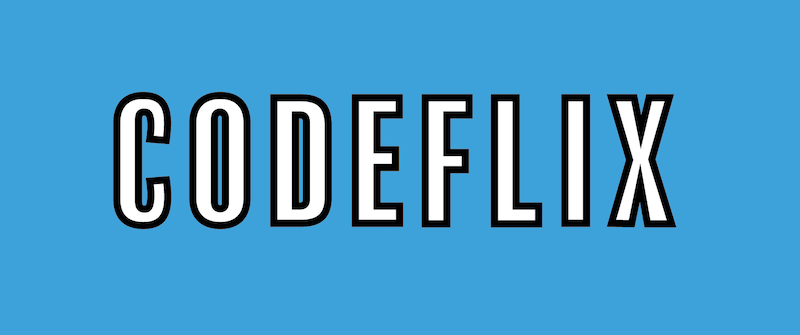

Create a profile: Steve
Users: 
Steve
Choose a user: Steve
Steve

                What would you like to do?

                Search - Search for shows
                Watch - Pick something from your watchlist
                Show Cast - Display cast members for a show 
                Add - Add a new user
                Quit - Close the application
            
What would you like to do? (search/watch/show cast/add/quit) show cast
What is the name of the series? silicon valley
Silicon Valley is a(n) comedy and has 53 episodes and an average rating of 8.4

Actor Name: Thomas Middleditch


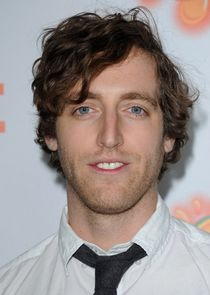


Character Name: Richard Hendricks


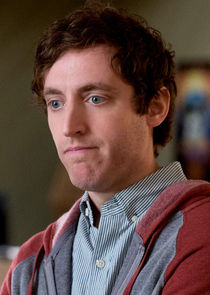


Actor Name: Martin Starr


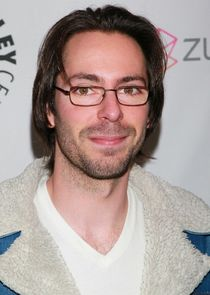


Character Name: Bertram Gilfoyle


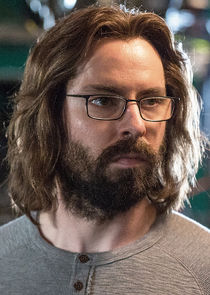


Actor Name: Kumail Nanjiani


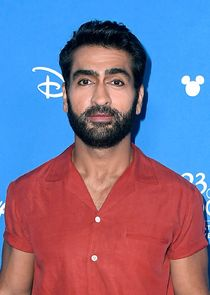


Character Name: Dinesh Chugtai


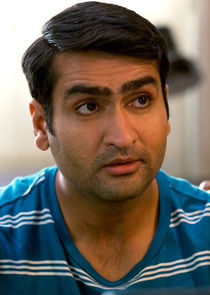


Actor Name: Zach Woods


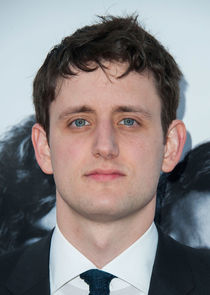


Character Name: Donald "Jared" Dunn


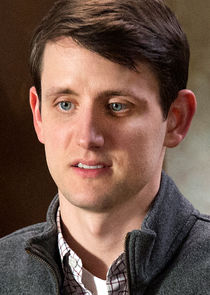


Actor Name: Matt Ross


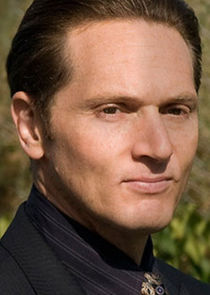


Character Name: Gavin Belson


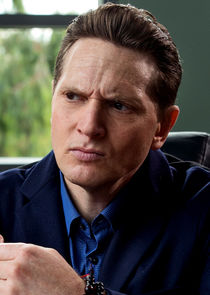


Actor Name: Amanda Crew


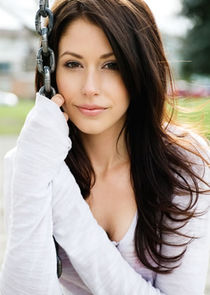


Character Name: Monica Hall


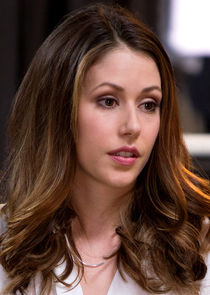


Actor Name: Josh Brener


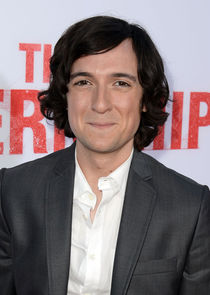


Character Name: Nelson "Big Head" Bighetti


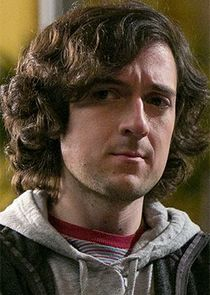


Actor Name: T.J. Miller


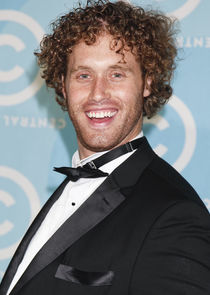


Character Name: Erlich Bachman


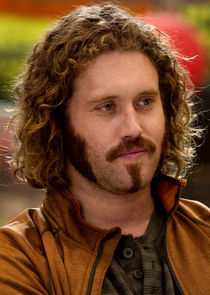


Actor Name: Jimmy O. Yang


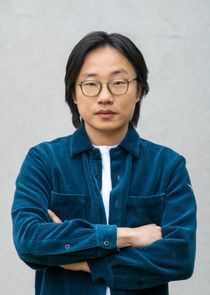


Character Name: Jian-Yang


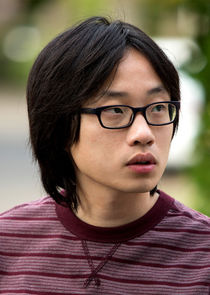


Actor Name: Suzanne Cryer


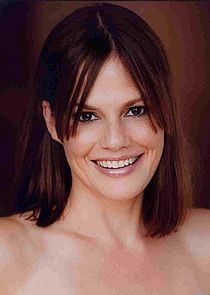


Character Name: Laurie Bream


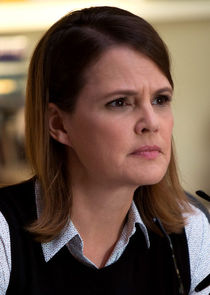


Actor Name: Chris Diamantopoulos


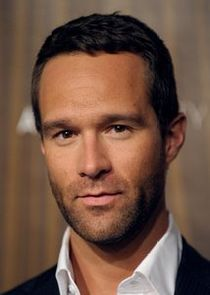


Character Name: Russ Hanneman


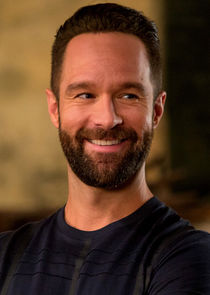


Actor Name: Stephen Tobolowsky


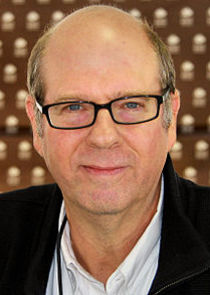


Character Name: Jack Barker


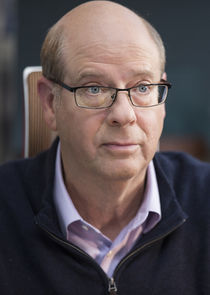


Actor Name: Christopher Evan Welch


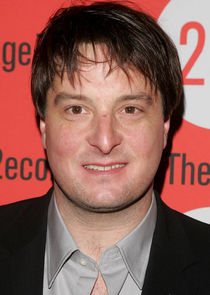


Character Name: Peter Gregory


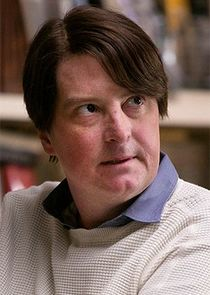

In [ ]:
codeflix = Theater()

codeflix.run()


##  Exercise 1:
Discuss what other classes, methods, or fields (attributes) we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads...

In [ ]:
# See above for the following additions in the code and updated working version of the app:
# --> class Cast
# --> Option to "Show Cast" in app
# --> Additional episode attributes in search results        
    
    